In [1]:
!pip install qiskit

     |████████████████████████████████| 6.1 MB 5.4 MB/s 
     |████████████████████████████████| 17.9 MB 110 kB/s 
     |████████████████████████████████| 236 kB 45.3 MB/s 
     |████████████████████████████████| 207 kB 44.4 MB/s 
     |████████████████████████████████| 2.1 MB 41.2 MB/s 
     |████████████████████████████████| 1.4 MB 38.4 MB/s 
     |████████████████████████████████| 634 kB 38.2 MB/s 
     |████████████████████████████████| 52 kB 1.3 MB/s 
     |████████████████████████████████| 943 kB 36.1 MB/s 
     |████████████████████████████████| 49 kB 6.0 MB/s 
     |████████████████████████████████| 38.2 MB 25 kB/s 
     |████████████████████████████████| 3.5 MB 39.8 MB/s 
     |████████████████████████████████| 6.3 MB 28.3 MB/s 
  Created wheel for qiskit: filename=qiskit-0.31.0-py3-none-any.whl size=11728 sha256=c6c49a26c04fa8ecd2f5cae585553097f57d7497b7d83f64760c304a5429377f
  Stored in directory: /root/.cache/pip/wheels/29/dd/b2/1fe1a9ac92aaf75b267d893ae27329ea229f292a29301

In [2]:
import qiskit as qk
from qiskit import IBMQ
from qiskit.tools.visualization import plot_histogram

In [3]:
qk.__qiskit_version__

/usr/local/lib/python3.7/dist-packages/qiskit/aqua/__init__.py:86: DeprecationWarning: The package qiskit.aqua is deprecated. It was moved/refactored to qiskit-terra For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua', 'qiskit-terra')


{'qiskit-terra': '0.18.3', 'qiskit-aer': '0.9.1', 'qiskit-ignis': '0.6.0', 'qiskit-ibmq-provider': '0.17.0', 'qiskit-aqua': '0.9.5', 'qiskit': None, 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

# **IBM Quantum Experience**

---
## Account

Copiar token de vuestra cuenta de IBM Quantum Experience.

In [4]:
IBMQ.save_account('a38bbc3b7d2bcb681631c4cbe83669dcdb5d1adde4deb262ec69a2da677a41ddba6b09618fcebc093045b8558820f26380110ae91bd863f732ad84e675e4fb40')

In [5]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [6]:
def show(obj):
    return [m for m in dir(obj) if not m.startswith('_')]

In [7]:
show(IBMQ)

['ibmq']

---
## Providers

In [8]:
IBMQ.providers()

[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>]

In [9]:
provider = IBMQ.get_provider(hub='ibm-q')
provider

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [10]:
show(provider)

['backend',
 'backends',
 'credentials',
 'experiment',
 'get_backend',
 'has_service',
 'random',
 'run_circuits',
 'runtime',
 'service',
 'services',
 'version']

In [11]:
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_m

---
## Backends

In [12]:
backend = provider.get_backend('ibmq_bogota')
backend

<IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>

In [13]:
show(backend)

['active_jobs',
 'configuration',
 'defaults',
 'group',
 'hub',
 'id_warning_issued',
 'job_limit',
 'jobs',
 'name',
 'options',
 'project',
 'properties',
 'provider',
 'qobj_warning_issued',
 'remaining_jobs_count',
 'reservations',
 'retrieve_job',
 'run',
 'set_options',
 'status',
 'version']

In [14]:
backend.name()

'ibmq_bogota'

In [15]:
backend.status()

In [16]:
show(_)

['backend_name',
 'backend_version',
 'from_dict',
 'operational',
 'pending_jobs',
 'status_msg',
 'to_dict']

In [17]:
backend.status().to_dict()

{'backend_name': 'ibmq_bogota',
 'backend_version': '1.6.10',
 'operational': True,
 'pending_jobs': 162,
 'status_msg': 'active'}

In [18]:
backend.jobs()

In [19]:
backend.job_limit().maximum_jobs

5

In [20]:
backend.remaining_jobs_count()

5

In [21]:
backend.active_jobs()

[]

### Backend configuration

In [22]:
back_config = backend.configuration().to_dict()
back_config

{'acquisition_latency': [],
 'allow_object_storage': True,
 'allow_q_object': True,
 'backend_name': 'ibmq_bogota',
 'backend_version': '1.6.10',
 'basis_gates': ['id', 'rz', 'sx', 'x', 'cx', 'reset'],
 'channels': {'acquire0': {'operates': {'qubits': [0]},
   'purpose': 'acquire',
   'type': 'acquire'},
  'acquire1': {'operates': {'qubits': [1]},
   'purpose': 'acquire',
   'type': 'acquire'},
  'acquire2': {'operates': {'qubits': [2]},
   'purpose': 'acquire',
   'type': 'acquire'},
  'acquire3': {'operates': {'qubits': [3]},
   'purpose': 'acquire',
   'type': 'acquire'},
  'acquire4': {'operates': {'qubits': [4]},
   'purpose': 'acquire',
   'type': 'acquire'},
  'd0': {'operates': {'qubits': [0]}, 'purpose': 'drive', 'type': 'drive'},
  'd1': {'operates': {'qubits': [1]}, 'purpose': 'drive', 'type': 'drive'},
  'd2': {'operates': {'qubits': [2]}, 'purpose': 'drive', 'type': 'drive'},
  'd3': {'operates': {'qubits': [3]}, 'purpose': 'drive', 'type': 'drive'},
  'd4': {'operates': {

In [23]:
f"{back_config['online_date']}"

'2020-06-03 04:00:00+00:00'

In [24]:
back_config['n_qubits']

5

In [25]:
back_config['basis_gates']

['id', 'rz', 'sx', 'x', 'cx', 'reset']

In [26]:
back_config['max_experiments']

100

In [27]:
back_config['max_shots']

20000

In [28]:
back_config['local']

False

In [29]:
back_config['simulator']

False

In [30]:
back_config['supported_instructions']

['play',
 'measure',
 'u3',
 'u2',
 'shiftf',
 'cx',
 'id',
 'sx',
 'x',
 'setf',
 'acquire',
 'reset',
 'u1',
 'rz',
 'delay']

In [31]:
back_config['coupling_map']

[[0, 1], [1, 0], [1, 2], [2, 1], [2, 3], [3, 2], [3, 4], [4, 3]]

**Detalle de los backends disponibles**

https://quantum-computing.ibm.com/docs/manage/backends/

### Backend properties

In [32]:
back_prop = backend.properties()

In [33]:
f'{back_prop.last_update_date}'

'2021-11-06 05:30:47+00:00'

In [34]:
back_prop.qubits

[[Nduv(datetime.datetime(2021, 11, 6, 4, 11, 33, tzinfo=tzlocal()), T1, us, 92.87119215384956),
  Nduv(datetime.datetime(2021, 11, 6, 4, 12, 21, tzinfo=tzlocal()), T2, us, 143.28407368015357),
  Nduv(datetime.datetime(2021, 11, 6, 5, 30, 47, tzinfo=tzlocal()), frequency, GHz, 5.000436868233961),
  Nduv(datetime.datetime(2021, 11, 6, 5, 30, 47, tzinfo=tzlocal()), anharmonicity, GHz, -0.33689239993289394),
  Nduv(datetime.datetime(2021, 11, 6, 4, 10, 54, tzinfo=tzlocal()), readout_error, , 0.01629999999999998),
  Nduv(datetime.datetime(2021, 11, 6, 4, 10, 54, tzinfo=tzlocal()), prob_meas0_prep1, , 0.023399999999999976),
  Nduv(datetime.datetime(2021, 11, 6, 4, 10, 54, tzinfo=tzlocal()), prob_meas1_prep0, , 0.0092),
  Nduv(datetime.datetime(2021, 11, 6, 4, 10, 54, tzinfo=tzlocal()), readout_length, ns, 5048.888888888889)],
 [Nduv(datetime.datetime(2021, 11, 6, 4, 11, 33, tzinfo=tzlocal()), T1, us, 55.792800763036006),
  Nduv(datetime.datetime(2021, 11, 6, 4, 13, 23, tzinfo=tzlocal()), T2,

In [35]:
back_prop.gates[25].to_dict()

{'gate': 'cx',
 'name': 'cx2_1',
 'parameters': [{'date': datetime.datetime(2021, 11, 6, 4, 27, 20, tzinfo=tzlocal()),
   'name': 'gate_error',
   'unit': '',
   'value': 0.009327257103256242},
  {'date': datetime.datetime(2021, 11, 3, 5, 30, 47, tzinfo=tzlocal()),
   'name': 'gate_length',
   'unit': 'ns',
   'value': 334.22222222222223}],
 'qubits': [2, 1]}

### Seleccionar un backend

In [36]:
provider.backends(simulator=True, operational=True)

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [37]:
q_devices = provider.backends(simulator=False, operational=True)
q_devices

[<IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [38]:
qk.providers.ibmq.least_busy(q_devices)

<IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>

In [39]:
{back.name(): back.status().pending_jobs for back in provider.backends()}

{'ibmq_armonk': 0,
 'ibmq_belem': 2,
 'ibmq_bogota': 163,
 'ibmq_lima': 5,
 'ibmq_manila': 32,
 'ibmq_qasm_simulator': 1,
 'ibmq_quito': 1,
 'ibmq_santiago': 688,
 'simulator_extended_stabilizer': 1,
 'simulator_mps': 1,
 'simulator_stabilizer': 2,
 'simulator_statevector': 1}

In [40]:
for job in backend.jobs(limit=5):
    print(f'{job.job_id()} - {job.name()} - {job.status()}')

618546dedbd1062c6ce0ee70 - None - JobStatus.DONE
618546d7973ff7e6be7c48df - None - JobStatus.DONE
6185464ddbd1064325e0ee69 - None - JobStatus.DONE
61843ee6da8a891cee50e455 -  - JobStatus.CANCELLED
61843dc36461396397cc3354 -  - JobStatus.CANCELLED


---
## Jobs

In [41]:
job = provider.backends.retrieve_job('5f9ff8e65bfe3800195fb156')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The `backends` provider attribute is deprecated. Please use `provider.backend` (singular) instead. You can continue to use `provider.backends()` to retrieve all backends.
  """Entry point for launching an IPython kernel.


In [42]:
job.status()

<JobStatus.DONE: 'job has successfully run'>

In [43]:
job.backend()

<IBMQRetiredBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>

In [44]:
job.result()

Result(backend_name='ibmqx2', backend_version='2.2.0', qobj_id='85d21030-9bef-4706-8952-41cdf831e2f8', job_id='5f9ff8e65bfe3800195fb156', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x0': 954, '0x1': 55, '0x2': 12, '0x3': 3}), header=QobjExperimentHeader(clbit_labels=[['c', 0], ['c', 1]], creg_sizes=[['c', 2]], global_phase=0.0, memory_slots=2, n_qubits=5, name='circuit140452', qreg_sizes=[['q', 5]], qubit_labels=[['q', 0], ['q', 1], ['q', 2], ['q', 3], ['q', 4]]), memory=False)], date=2020-11-02 12:20:44+00:00, status=Successful completion, time_taken=4.885810375213623, execution_id='d27d59ec-1d05-11eb-baf4-ac1f6b91f43c', client_version={'composer-job': 'unknown'})

In [45]:
job.result().get_counts()

{'00': 954, '01': 55, '10': 12, '11': 3}

In [46]:
f'{job.creation_date()}'

'2020-11-02 12:17:42.491000+00:00'

In [47]:
job.queue_info()

In [48]:
job.time_per_step()

{'COMPLETED': datetime.datetime(2020, 11, 2, 12, 20, 45, 810000, tzinfo=tzlocal()),
 'CREATING': datetime.datetime(2020, 11, 2, 12, 17, 42, 491000, tzinfo=tzlocal()),
 'QUEUED': datetime.datetime(2020, 11, 2, 12, 17, 44, 374000, tzinfo=tzlocal()),
 'RUNNING': datetime.datetime(2020, 11, 2, 12, 20, 38, 48000, tzinfo=tzlocal()),
 'TRANSPILED': datetime.datetime(2020, 11, 2, 12, 17, 43, 311000, tzinfo=tzlocal()),
 'TRANSPILING': datetime.datetime(2020, 11, 2, 12, 17, 42, 637000, tzinfo=tzlocal()),
 'VALIDATED': datetime.datetime(2020, 11, 2, 12, 17, 44, 276000, tzinfo=tzlocal()),
 'VALIDATING': datetime.datetime(2020, 11, 2, 12, 17, 43, 450000, tzinfo=tzlocal())}

## Ejemplo

In [49]:
import qiskit as qk

In [50]:
backend = provider.get_backend('ibmq_bogota')

In [51]:
qr = qk.QuantumRegister(3)
cr = qk.ClassicalRegister(3)
circuit = qk.QuantumCircuit(qr, cr)

In [52]:
circuit.draw()

q0_0: 
      
q0_1: 
      
q0_2: 
      
c0: 3/

In [53]:
circuit.x(qr[0])
circuit.barrier()
circuit.draw()

┌───┐ ░ 
q0_0: ┤ X ├─░─
      └───┘ ░ 
q0_1: ──────░─
            ░ 
q0_2: ──────░─
            ░ 
c0: 3/════════

In [54]:
circuit.x(qr[1])
circuit.ccx(qr[0], qr[1], qr[2])

In [55]:
circuit.draw()

┌───┐ ░           
q0_0: ┤ X ├─░────────■──
      └───┘ ░ ┌───┐  │  
q0_1: ──────░─┤ X ├──■──
            ░ └───┘┌─┴─┐
q0_2: ──────░──────┤ X ├
            ░      └───┘
c0: 3/══════════════════

In [56]:
circuit.cx(qr[0], qr[1])
circuit.measure(qr, cr)
circuit.draw()

┌───┐ ░                ┌─┐   
q0_0: ┤ X ├─░────────■────■──┤M├───
      └───┘ ░ ┌───┐  │  ┌─┴─┐└╥┘┌─┐
q0_1: ──────░─┤ X ├──■──┤ X ├─╫─┤M├
            ░ └───┘┌─┴─┐└┬─┬┘ ║ └╥┘
q0_2: ──────░──────┤ X ├─┤M├──╫──╫─
            ░      └───┘ └╥┘  ║  ║ 
c0: 3/════════════════════╩═══╩══╩═
                          2   0  1

In [57]:
job = qk.execute(circuit, backend)

In [58]:
job.status()

<JobStatus.QUEUED: 'job is queued'>

In [59]:
result = job.result()
result.to_dict()

{'backend_name': 'ibmq_bogota',
 'backend_version': '1.6.10',
 'client_version': {'qiskit-aer': '0.9.1',
  'qiskit-ibmq-provider': '0.17.0',
  'qiskit-ignis': '0.6.0',
  'qiskit-terra': '0.18.3'},
 'date': datetime.datetime(2021, 11, 6, 6, 25, 2, tzinfo=tzlocal()),
 'error': None,
 'execution_id': '42439782-3eca-11ec-9c7b-b02628eaa3aa',
 'header': {'backend_name': 'ibmq_bogota', 'backend_version': '1.6.10'},
 'job_id': '61861f848a1351119d2ad44e',
 'qobj_id': 'ab5833bf-384a-4bed-b260-4d28ec0df7f7',
 'results': [{'data': {'counts': {'0x0': 21,
     '0x1': 217,
     '0x2': 23,
     '0x3': 95,
     '0x4': 24,
     '0x5': 480,
     '0x6': 25,
     '0x7': 139}},
   'header': {'clbit_labels': [['c0', 0], ['c0', 1], ['c0', 2]],
    'creg_sizes': [['c0', 3]],
    'global_phase': 1.9634954084936176,
    'memory_slots': 3,
    'metadata': {},
    'n_qubits': 5,
    'name': 'circuit-9',
    'qreg_sizes': [['q', 5]],
    'qubit_labels': [['q', 0], ['q', 1], ['q', 2], ['q', 3], ['q', 4]]},
   'meas_

In [60]:
result.get_counts()

{'000': 21,
 '001': 217,
 '010': 23,
 '011': 95,
 '100': 24,
 '101': 480,
 '110': 25,
 '111': 139}

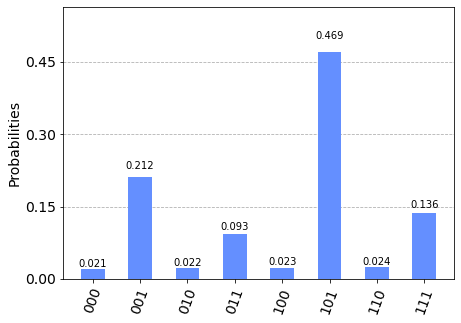

In [61]:
plot_histogram(_)

In [62]:
job.job_id()

'61861f848a1351119d2ad44e'

## Otro ejemplo

In [63]:
qreg_q = qk.QuantumRegister(2, 'q')
creg_c = qk.ClassicalRegister(2, 'c')
circuit = qk.QuantumCircuit(qreg_q, creg_c)

In [64]:
circuit.h(qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.barrier()
circuit.cx(qreg_q[0], qreg_q[1])
circuit.h(qreg_q[0])
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[1])
circuit.draw()

┌───┐      ░      ┌───┐┌─┐
q_0: ┤ H ├──■───░───■──┤ H ├┤M├
     └───┘┌─┴─┐ ░ ┌─┴─┐└┬─┬┘└╥┘
q_1: ─────┤ X ├─░─┤ X ├─┤M├──╫─
          └───┘ ░ └───┘ └╥┘  ║ 
c: 2/════════════════════╩═══╩═
                         1   0

In [65]:
job = qk.execute(circuit, backend)

In [66]:
job.status()

<JobStatus.VALIDATING: 'job is being validated'>

In [67]:
show(job.queue_info())

['estimated_complete_time',
 'estimated_start_time',
 'format',
 'group_priority',
 'hub_priority',
 'job_id',
 'position',
 'project_priority']

In [68]:
job.queue_info().estimated_start_time

datetime.datetime(2021, 11, 6, 7, 8, 23, 176000, tzinfo=tzlocal())

In [69]:
job = qk.execute(circuit, backend, shots=2048)

## Compilar jobs antes de enviarlos

El circuito que diseñamos tiene que adaptarse a las propiedades de cada backend. Esto es transparente para nosotros si lo ejecutamos como hacemos más arriba. Sin embargo, aveces puede que nos interese tener control también sobre esa parte.

In [70]:
mapped_circuit = qk.compiler.transpile(circuit, backend=backend)
qobj = qk.compiler.assemble(mapped_circuit, backend=backend, shots=2048)
job = backend.run(qobj)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Passing a Qobj to Backend.run is deprecated and will be removed in a future release. Please pass in circuits or pulse schedules instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [71]:
job.status()

<JobStatus.QUEUED: 'job is queued'>

## Job managers

In [72]:
from qiskit.providers.ibmq.managed import IBMQJobManager

sim_backend = provider.get_backend('ibmq_qasm_simulator')
circs =  qk.compiler.transpile([circuit]*20, backend=sim_backend)

job_manager = IBMQJobManager()
job_set = job_manager.run(circs, backend=sim_backend, name='foo')

In [73]:
print(job_set.report())

Job set name: foo
          ID: 452bc88aa6b946a3bc43e7c1560fad34-16361799829552133
        tags: []
Summary report:
       Total jobs: 1
  Successful jobs: 1
      Failed jobs: 0
   Cancelled jobs: 0
     Running jobs: 0
     Pending jobs: 0

Detail report:
  experiments: 0-19
    job index: 0
    job ID: 6186200f4ba9901ca98fea2b
    name: foo_0_
    status: job has successfully run


In [74]:
# Restrict 10 experiments per job.
job_set_multiple = job_manager.run(circs, backend=sim_backend, name='bar', max_experiments_per_job=10)

In [75]:
print(job_set_multiple.report())

Job set name: bar
          ID: 8ce821e52fa44c8ea0e48553d4f8f683-16361800018313441
        tags: []
Summary report:
       Total jobs: 2
  Successful jobs: 2
      Failed jobs: 0
   Cancelled jobs: 0
     Running jobs: 0
     Pending jobs: 0

Detail report:
  experiments: 0-9
    job index: 0
    job ID: 61862022dbd931c65fe98720
    name: bar_0_
    status: job has successfully run
  experiments: 10-19
    job index: 1
    job ID: 618620224ba990bb588fea2c
    name: bar_1_
    status: job has successfully run


In [76]:
job_set_multiple.results().get_counts(1)

{'00': 1024}

In [77]:
job_set_multiple.jobs()

---
## Notas

- Sólo 5 jobs de una misma cuenta pueden estar en cola o ejecutándose al mismo tiempo.
- En el simulador normalmente no hay tiempos de espera, pero los jobs están limitados a tiempos de ejecución de 10,000 segundos (~2.75 horas).
- Fair-share queuing system -> Algoritmo que calcula el orden de los jobs de forma dinámica.
- Para reservar tiempo -> Sólo organizaciones que pertenecen a IBM Q Network.